# Glioma Grade Classification Project

## Introduction

The goal of this project is to develop a machine learning model capable of accurately detecting the grade of glioma in individuals. Gliomas are a type of brain tumor, and accurately identifying the grade is crucial for determining the appropriate treatment for patients. The target variable in this project is the glioma grade, with two classes: "LGG" (Low-Grade Glioma) and "GBM" (Glioblastoma Multiforme).

In order to carry this project, we are going to use dataset from 'Hierarchical Voting-Based Feature Selection and Ensemble Learning Model Scheme for Glioma Grading with Clinical and Molecular Characteristics By E. Tasci, Y. Zhuge, Harpreet Kaur, K. Camphausen, A. Krauze. 2022'. The author managed to get 87.606% using 20.5 (mean) number of features. By the end of this project, we found out that our KNN model managed to get to 87.8% accuracy by only using 5 features.

## Project Objective

The primary objective is to leverage clinical and molecular data to train a model that can predict the glioma grade. Molecular analysis, while informative, can be expensive. Therefore, the focus is on identifying the most relevant features among the 20 most recently mutated genes, while also addressing 3 features regarding clinical/demography data of the patients. These features will be used to build a predictive model that can assist in glioma grade classification.

## Dataset Features

### Demographic Information

- **Grade (Target):** Glioma grade class information. (*LGG*, *GBM*-->*0*,*1*)
- **Gender:** Gender information. (*MALE*, *FEMALE*)
- **Age at Diagnosis:** Age at diagnosis measured in years.
- **Race:** Race information.

### Molecular Mutation Status

- **IDH1:** Isocitrate dehydrogenase 1 mutation status (*NOT_MUTATED*, *MUTATED*).
- **TP53:** Tumor protein p53 mutation status (*NOT_MUTATED*, *MUTATED*).
- **ATRX:** ATRX chromatin remodeler mutation status (*NOT_MUTATED*, *MUTATED*).
- **PTEN:** Phosphatase and tensin homolog mutation status (*NOT_MUTATED*, *MUTATED*).
- **EGFR:** Epidermal growth factor receptor mutation status (*NOT_MUTATED*, *MUTATED*).
- **CIC:** Capicua transcriptional repressor mutation status (*NOT_MUTATED*, *MUTATED*).
- **MUC16:** Mucin 16 mutation status (*NOT_MUTATED*, *MUTATED*).
- **PIK3CA:** Phosphatidylinositol-4,5-bisphosphate 3-kinase catalytic subunit alpha mutation status (*NOT_MUTATED*, *MUTATED*).
- **NF1:** Neurofibromin 1 mutation status (*NOT_MUTATED*, *MUTATED*).
- **PIK3R1:** Phosphoinositide-3-kinase regulatory subunit 1 mutation status (*NOT_MUTATED*, *MUTATED*).
- **FUBP1:** Far upstream element binding protein 1 mutation status (*NOT_MUTATED*, *MUTATED*).
- **RB1:** RB transcriptional corepressor 1 mutation status (*NOT_MUTATED*, *MUTATED*).
- **NOTCH1:** Notch receptor 1 mutation status (*NOT_MUTATED*, *MUTATED*).
- **BCOR:** BCL6 corepressor mutation status (*NOT_MUTATED*, *MUTATED*).
- **CSMD3:** CUB and Sushi multiple domains 3 mutation status (*NOT_MUTATED*, *MUTATED*).
- **SMARCA4:** SWI/SNF related, matrix associated, actin-dependent regulator of chromatin, subfamily a, member 4 mutation status (*NOT_MUTATED*, *MUTATED*).
- **GRIN2A:** Glutamate ionotropic receptor NMDA type subunit 2A mutation status (*NOT_MUTATED*, *MUTATED*).
- **IDH2:** Isocitrate dehydrogenase (NADP(+)) 2 mutation status (*NOT_MUTATED*, *MUTATED*).
- **FAT4:** FAT atypical cadherin 4 mutation status (*NOT_MUTATED*, *MUTATED*).
- **PDGFRA:** Platelet-derived growth factor receptor alpha mutation status (*NOT_MUTATED*, *MUTATED*).

### Additional Information

- **Project:** Corresponding TCGA-LGG or TCGA-GBM project names.
- **Case_ID:** Related project Case_ID information.
- **Primary_Diagnosis:** Type of primary diagnosis information.

## Importance of Glioma Grade Detection

Accurate glioma grade detection is vital for guiding healthcare professionals in determining the most appropriate treatment strategies for patients. By analyzing clinical and molecular features, we aim to build a robust predictive model that can contribute to the accurate diagnosis of glioma, ultimately improving patient outcomes.


# Data Importing and Preprocessing

## Before Split

First we import numpy and pandas because this is rudimentary for our analysis. **Note: Please install numpy==1.23.5, otherwise there will be one code cell that cannot be executed.**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

And then we import the data, and drop duplicates as it may cause bias in the feature weight.

In [ ]:
#Importing dataset
df = pd.read_csv('/kaggle/input/glioma-grade-classification/TCGA_GBM_LGG_Mutations_all.csv')
#Dropping duplicates
df=df.drop_duplicates()
df.head()

And then we will drop three columns: Project, Case_ID, and Primary_Diagnosis. Project and Case_ID are arbitrary identifier that is not necessary for our analysis while Primary_Diagnosis seems to correlate a lot with Glioma's grade which only kill the purpose of our analysis if we include it.

In [ ]:
#Dropping columns: Project, Case_ID, Primary_Diagnosis as they might not help with our modelling
df=df.drop(['Project','Case_ID','Primary_Diagnosis'],axis=1)
df.head()

And then we check for any NaN value using .info() attribute.

In [ ]:
#Checking the overall information regarding our dataframe
df.info()

Double check with .value_counts(). As you can see below, there actually happened to be some problematic values such as '--' and 'not_reported'.

In [ ]:
#Making sure there are no problematic values other than NaN values
for col in df.columns:
    print(df[col].value_counts())

Therefore for now we will replace '--' and 'not_reported' by NaN. This will it easier for us to impute them later.

In [ ]:
# Replace '--' and 'not reported' with NaN and then we will impute them later
df.replace(['--','not reported'], np.nan, inplace=True)
print(f'features to be imputed:{df.columns[df.isnull().any()]}')

# Display the DataFrame after dropping rows
df.info()

And then we convert the format of Age_at_diagnosis. Let's say if a patient's age is 30 years 182 days, we will convert it into 30.5 years.

In [ ]:
# Convert age from 'Age_at_diagnosis' column into float and check for any problematic value in it

# Extract years and days
years = df['Age_at_diagnosis'].str.extract(r'(\d+) years').astype(float)
days = df['Age_at_diagnosis'].str.extract(r'(\d+) days').astype(float)
# Fill NaN values with 0
years = years.fillna(0)
days = days.fillna(0)
# Calculate the age in years with fractions
df['Age_at_diagnosis'] = years + (days / 365)
print(df['Age_at_diagnosis'].value_counts().sort_index())
print(df.info())

And then we are going to split our dataframe into training data and testing data. But before that, we should check the ratio of our target to decide whether we are going to stratify or not. Stratify is a process where we keep the ratio of our target so a 50:50 ratio in dataframe will be splitted into 50:50 ratio in training data and 50:50 ratio in test data also.

In [ ]:
#checking out the ratio of target values to find out whether we need to stratify or not later

print(df['Grade'].value_counts(normalize=True))

Since our target has different ratio, we are going to stratify them during splitting below.

In [ ]:
#stratifying/splitting dataframe into train and test dataset
from sklearn.model_selection import train_test_split

# Splitting to avoid data leakage (train : test = 80% : 20%)
train , test = train_test_split(df,train_size=0.8, random_state=42,stratify=df.Grade) #stratify the target column

### After Split

Now that we have splitted our data, we can polish our train data by imputing NaN values, scaling, dropping unimportant features, and then apply the same rule to test data using the same procedure that we have applied to our training data.

#### Encoding and Imputation

Below we encode target using simple binary encoding, imputing NaN values, and the most important ones is encoding our features afterward. We will choose KFold Encoding because it will help us so much in addressing proper label that is not arbitrary (unlike label encoding/one-hot-encoding) while preventing data leakage from our target to our features.

After encoding target and imputing features, we will create the KFOld custom function as shown below.

In [ ]:
#Label our target, impute some features that have NaN values, and perform encoding for our categorical features
from sklearn.impute import SimpleImputer

# Step 1: Label our target so we can do K fold target encoding
train['Grade'] = train['Grade'].replace({'GBM': 1, 'LGG': 0})
test['Grade'] = test['Grade'].replace({'GBM': 1, 'LGG': 0})

# Step 2: Perform imputation to both training and test sets
imputer= SimpleImputer(strategy='most_frequent')
train[train.columns[train.isnull().any()]]=pd.DataFrame(imputer.fit_transform(train[train.columns[train.isnull().any()]]),columns=train.columns[train.isnull().any()],index=train.index)
test[test.columns[test.isnull().any()]]=pd.DataFrame(imputer.transform(test[train.columns[test.isnull().any()]]),columns=test.columns[test.isnull().any()],index=test.index)

# Impute also 0 values in Age_at_diagnosis into its median
median_imputation=train[train['Age_at_diagnosis']!=0]['Age_at_diagnosis'].median()
train['Age_at_diagnosis'] = train['Age_at_diagnosis'].apply(lambda x: median_imputation if x==0 else x)
test['Age_at_diagnosis'] = test['Age_at_diagnosis'].apply(lambda x: median_imputation if x==0 else x)

# Step 3: Apply K fold target encoding to both training and test sets

# Define encoder function for training dataset
from sklearn import base
from sklearn.model_selection import KFold

class KFoldTargetEncoderTrain(base.BaseEstimator,
                               base.TransformerMixin):
    def __init__(self,colnames,targetName,
                  n_fold=5, verbosity=True,
                  discardOriginal_col=False):
        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        mean_of_target = X[self.targetName].mean()
        kf = KFold(n_splits = self.n_fold,
                   shuffle = False, random_state=None)
        col_mean_name = self.colnames + '_' + 'Kfold'
        X[col_mean_name] = np.nan
        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
            X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(X_tr.groupby(self.colnames)
                                     [self.targetName].mean())
            X[col_mean_name].fillna(mean_of_target, inplace = True)
        if self.verbosity:
            encoded_feature = X[col_mean_name].values
        if self.discardOriginal_col:
            X = X.drop(self.targetName, axis=1)
        return X
    
# Define encoder function for test dataset
class KFoldTargetEncoderTest(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, train, colNames, encodedName):
        self.train = train
        self.colNames = colNames
        self.encodedName = encodedName
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        mean = self.train[[self.colNames, self.encodedName]].groupby(self.colNames).mean().reset_index() 
        
        dd = {}
        for index, row in mean.iterrows():
            dd[row[self.colNames]] = row[self.encodedName]
        
        encoded_column = X[self.colNames].map(dd)
        X[self.encodedName] = encoded_column
        
        return X

And then we will run the function, complete the KFold encoding, and check how our dataframe has turned out.

In [ ]:
for i in train.columns:
    if i not in ['Grade','Age_at_diagnosis']:
        targetc = KFoldTargetEncoderTrain(i,'Grade',n_fold=5)
        new_train = targetc.fit_transform(train)
        test_targetc = KFoldTargetEncoderTest(new_train,
                                              i,
                                              i+'_Kfold')
        new_test = test_targetc.fit_transform(test)
        
# Filter columns in the final train and test DataFrames
train = new_train[['Grade', 'Age_at_diagnosis'] + [col for col in new_train.columns if '_Kfold' in col]]
test = new_test[['Grade', 'Age_at_diagnosis'] + [col for col in new_test.columns if '_Kfold' in col]]
print(train.head())
print(test.head())

#### Min-Max Scaling

Next we will perform Min-Max scaling to our one and only numerical data: Age_at_diagnosis. This is important to reduce the risk of Age_at_diagnosis having too much influence more than it should has to the model's prediction.

In [ ]:
#Perform feature scaling for our one and only numerical feature
from sklearn.preprocessing import MinMaxScaler

#Step 1: Initialize the MinMaxScaler
scaler = MinMaxScaler()

#Step 2 Drop the original 'Age_at_diagnosis' column, create new series for the scaled ones, and concatenate to the train/test dataframes
## For the training set
train = pd.concat([train.drop(columns=['Age_at_diagnosis']),
                   pd.DataFrame(scaler.fit_transform(train[['Age_at_diagnosis']]), columns=['Age_at_diagnosis'], index=train.index)], axis=1)
## For the test set
test = pd.concat([test.drop(columns=['Age_at_diagnosis']),
                   pd.DataFrame(scaler.transform(test[['Age_at_diagnosis']]), columns=['Age_at_diagnosis'], index=test.index)], axis=1)
print(train.head())
print(test.head())

#### Dropping Unimportant Features

Now that our data is ready, we can try to visualize our data to get the grasp of the characteristic of our data before dropping unnecessary features.

In [ ]:
# Defining Visualization Function for numerical column
import seaborn as sns
import matplotlib.pyplot as plt

# Defining plot functions
def dist_bivariate(df):
    num_plots = len(df.columns)
    num_cols = 3  # Number of columns per row
    num_rows = -(-num_plots // num_cols)  # Ceiling division to determine the number of rows
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 2 * num_rows))
    axes = axes.flatten()
    for i, col in enumerate(df.columns):
        if i < num_plots:
            sns.histplot(data=df, x=col, hue='Grade', palette='cubehelix', ax=axes[i])
            axes[i].set_title(col)
            axes[i].legend()
    # Adjust layout to prevent overlap of titles and labels
    plt.tight_layout()
    plt.show()

# Plotting the data
dist_bivariate(train)

Amazingly, we managed to find some categorical features that correlate strongly with one of the target. The most notable ones are 'IDH1' and 'PTEN' that clearly have separation between green and pink bar.

Amazingly again, we found out that there are clearly separated range of age that correlates to one of the 'Grade' values. Younger people tend to be inflicted by LGG grade glioma while older ones tend to be inflicted by GBM grade glioma. 

These features are strong contender for our selected features.

Next we will try to confirm it by making correlation matrix using Cramer's V method. The idea is to filter features that is highly correlated to other features to the point of redundance and doesn't add much value to our prediction.

A strong correlation between variables is marked at 0.25 and above (Akoglu, H. (Year). User's guide to correlation coefficients. Marmara University School of Medicine, Department of Emergency Medicine, Istanbul, Turkey). Therefore we are going to filter out any features that have **absolute** collinearity against each other at >0.25 point.

In [ ]:
#Making cramer's matrix to spot collinearity within categorical features
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramér's V for each pair of categorical variables excluding numerical columns and 'Grade'
cramers_matrix = pd.DataFrame(index=[col for col in train.columns if col !='Age_at_diagnosis'], 
                              columns=[col for col in train.columns if col !='Age_at_diagnosis'])
for col1 in cramers_matrix.columns:
    for col2 in cramers_matrix.columns:
        cramers_matrix.loc[col1, col2] = cramers_v(train[col1], train[col2])

# Create a heatmap using seaborn to check for collinearity in our training dataset
plt.figure(figsize=(20, 8))
sns.heatmap(cramers_matrix.astype(float), annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Heatmap for Categorical Features")
plt.show()

In [ ]:
# Finding all features with absolute correlation value >=0.25, and then weed out those that have lower correlation against 'Grade' value
filtered_cramers_matrix = set()  # Use a set to automatically handle duplicates
for col1 in cramers_matrix.columns:
    for col2 in cramers_matrix.columns:
        if abs(cramers_matrix.loc[col1, col2]) >= 0.25 and col1 != col2 and col1 != 'Grade' and col2 != 'Grade':
            if abs(cramers_matrix.loc[col1, 'Grade']) > abs(cramers_matrix.loc[col2, 'Grade']):
                filtered_cramers_matrix.add(col2)
            else:
                filtered_cramers_matrix.add(col1)

filtered_cramers_matrix = list(filtered_cramers_matrix)  # Convert back to a list
print(filtered_cramers_matrix)

But there are too many columns to drop. We shall try keeping some of the mutation features that have correlation point of 0.25 or above to the target; namely ATRK, PTEN, and CIC. Let's not forget to keep Age_at_diagnosis as our numerical feature.

In [ ]:
# Drop the all columns with high collinearity with each others but spares ATRX, PTEN, CIC, and Age_at_diagnosis
train = train.drop(columns=[col for col in filtered_cramers_matrix if col not in ['ATRX_Kfold','PTEN_Kfold','CIC_Kfold','Age_at_diagnosis']])
test = test.drop(columns=[col for col in filtered_cramers_matrix if col not in ['ATRX_Kfold','PTEN_Kfold','CIC_Kfold','Age_at_diagnosis']])
print(train.head())
print(test.head())

We are done with our feature filtering. Finally we can splite our features into x_train, x_test, y_train, and y_test and start fitting them into models.

In [ ]:
#Separate x from y in train and test dataframe
x_train=train.copy()
y_train=x_train.pop('Grade')
x_test=test.copy()
y_test=x_test.pop('Grade')

# Model Hyperparameter Tuning and Making Prediction

Now we will attempt to use four classifier models as follow:
1. Logistic Regression
2. K-Nearest Neighbors
3. Naive Bayes
4. Support Vector Machine

At the end, these traits will be compared:
- Accuracy
- Learning Curve
- Classification Report

## 1. Logistic Regression

### Accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score

# Initiate regression object, class weight refers to the count ratio of each class per total class
logistic_regression = LogisticRegression(random_state = 42, class_weight = {0: df['Grade'].value_counts(normalize=True)[1], 
                                                                            1: df['Grade'].value_counts(normalize=True)[0]})

# Apply hyperparameter tuning
param = {
    'tol': [0.0001, 0.001, 0.01],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'C': [0.5,1,1.5],
    'fit_intercept':[False, True],
}

bayes_search = BayesSearchCV(estimator=logistic_regression, search_spaces=param, 
                             cv=10,n_jobs=-1,n_iter=30, scoring='roc_auc')
bayes_search.fit(x_train, y_train)
print("Parameter Terbaik:", bayes_search.best_params_)

logistic_regression = LogisticRegression(**bayes_search.best_params_,random_state = 42, class_weight = {0: df['Grade'].value_counts(normalize=True)[1], 
                                                                            1: df['Grade'].value_counts(normalize=True)[0]})

# Fit model to training data
logistic_regression.fit(x_train, y_train)

# Calculating accuracy
print(f"Train Accuracy : {accuracy_score(y_train, logistic_regression.predict(x_train))*100} %" )
print(f"Test Accuracy : {accuracy_score(y_test, logistic_regression.predict(x_test))*100} %" )

### Learning Curve

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Combine x_train and x_test to form new dataframe for learning curve plotting
x = pd.concat([x_train, x_test], axis=0)

# Combine y_train and y_test to form new dataframe for learning curve plotting
y = pd.concat([y_train, y_test], axis=0)

# Create learning curve function
def plot_learning_curve_classification(model, X, y, cv, scoring, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Number of Training Samples")
    plt.ylabel(scoring)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training " + scoring)
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing " + scoring)

    plt.legend(loc="best")
    plt.show()
    
# plot learning curve
plot_learning_curve_classification(logistic_regression, x, y, cv=10, scoring='accuracy', title="Logistic Regression Learning Curve")
plot_learning_curve_classification(logistic_regression, x, y, cv=10, scoring='roc_auc', title="Logistic Regression Learning Curve")

### Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Define function to calculate our classification report
def evaluate(model, name, x_test = x_test, y_test = y_test, x_train=x_train, y_train=y_train):

    y_pred_train = model.predict(x_train)
    print('======= Data Train =======')
    print('------')
    print('Confusion Matrix Data Train:')
    print()
    print(classification_report(y_train, y_pred_train))
    print('------')
    matrix = pd.crosstab(y_train, y_pred_train, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.xticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.show()

    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
    print('Assuming 1 as positive, we get for Data Train:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy Data Train:', accuracy_score(y_train, y_pred_train))
    print('Precision Data Train:', precision)
    print('Recall Data Train:', recall)
    print('F1-Score Data Train:', 2 * (precision * recall)/(precision + recall))

    y_pred_test = model.predict(x_test)
    print('======= Data Test =======')
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred_test))
    print('------')
    matrix = pd.crosstab(y_test, y_pred_test, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.xticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.show()

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy Data Test:', accuracy_score(y_test, y_pred_test))
    print('Precision Data Test:', precision)
    print('Recall Data Test:', recall)
    print('F1-Score Data Test:', 2 * (precision * recall)/(precision + recall))

# Get our classification report
evaluate(logistic_regression, 'Logistic Regression Evaluation')

## 2. K-Nearest Neighbors

### Accuracy

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Find optimum n_neighbor
error = []
for i in range(1,31,1):
    knn =  KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    preds = knn.predict(x_test)
    error.append(np.mean(preds!=y_test))
n_neighbor = error.index(np.min(error))+1
print(f'optimum n_neighbor: {n_neighbor}')

# Apply hyperparameter tuning to find optimum other parameters
param = {
    'p':[1.0,1.5,2.0],
    'leaf_size': [20,30,40],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
}
knn = KNeighborsClassifier(n_neighbors=n_neighbor)
bayes_search = BayesSearchCV(estimator=knn, search_spaces=param, 
                             cv=10,n_jobs=-1,n_iter=30,scoring='roc_auc')
bayes_search.fit(x_train, y_train)
print("Parameter Terbaik:", bayes_search.best_params_)

# Fit the model
knn = KNeighborsClassifier(**bayes_search.best_params_,n_neighbors=n_neighbor)
knn.fit(x_train, y_train)

# Calculating accuracy
print(f"Train Accuracy : {accuracy_score(y_train, knn.predict(x_train))*100} %" )
print(f"Test Accuracy : {accuracy_score(y_test, knn.predict(x_test))*100} %" )

### Learning Curve

In [ ]:
# plot learning curve
plot_learning_curve_classification(knn, x, y, cv=10, scoring='accuracy', title="KNN Learning Curve")
plot_learning_curve_classification(knn, x, y, cv=10, scoring='roc_auc', title="KNN Learning Curve")

### Classification Report

In [ ]:
# Get our classification report
evaluate(knn, 'KNN Evaluation')

## 3. Naive Bayes

### Accuracy

In [ ]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import GridSearchCV

naive_model = GaussianNB()


# Apply hyperparameter tuning to find optimum other parameters
param = {'priors':[[0.03,0.97],[0.04,0.96],[0.05,0.95],[0.1,0.9]],
    'var_smoothing':[1e-14,1e-13,1e-12,1e-11,1e-10,1e-9,1e-8]
}
naive_model = GaussianNB()
grid_search = GridSearchCV(estimator=naive_model, param_grid=param, 
                             cv=10,n_jobs=-1,scoring='roc_auc')
grid_search.fit(x_train, y_train)
print("Parameter Terbaik:", grid_search.best_params_)

# Fit the model
naive_model = GaussianNB(**grid_search.best_params_)
naive_model.fit(x_train, y_train)

# Calculating accuracy
print(f"Train Accuracy : {accuracy_score(y_train, naive_model.predict(x_train))*100} %" )
print(f"Test Accuracy : {accuracy_score(y_test, naive_model.predict(x_test))*100} %" )

### Learning Curve

In [ ]:
# plot learning curve
plot_learning_curve_classification(naive_model, x, y, cv=10, scoring='accuracy', title="Naive Model Learning Curve")
plot_learning_curve_classification(naive_model, x, y, cv=10, scoring='roc_auc', title="Naive Model Learning Curve")

### Classification Report

In [ ]:
# Get our classification report
evaluate(naive_model, 'Naive Model Evaluation')

## 4. Support Vector Machine

### Accuracy

In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state = 42, class_weight = {0: df['Grade'].value_counts(normalize=True)[1], 
                                                     1: df['Grade'].value_counts(normalize=True)[0]})

# Apply hyperparameter tuning
param = {
    'tol': [0.0001, 0.001, 0.01],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.5,1,1.5],
    'degree':[2,3,4,5,6],
    'coef0':[0.0,0.5,1.0,2.0]
}

bayes_search = BayesSearchCV(estimator=svc, search_spaces=param, 
                             cv=10,n_jobs=-1, n_iter=30, scoring='roc_auc')
bayes_search.fit(x_train, y_train)
print("Parameter Terbaik:", bayes_search.best_params_)

# Fit the model
svc = SVC(**bayes_search.best_params_,random_state = 42, 
                  class_weight = {0: df['Grade'].value_counts(normalize=True)[1], 
                                  1: df['Grade'].value_counts(normalize=True)[0]})
svc.fit(x_train, y_train)

# Calculating accuracy
print(f"Train Accuracy : {accuracy_score(y_train, svc.predict(x_train))*100} %" )
print(f"Test Accuracy : {accuracy_score(y_test, svc.predict(x_test))*100} %" )

### Learning Curve

In [ ]:
# plot learning curve
plot_learning_curve_classification(svc, x, y, cv=10, scoring='accuracy', title="SVC Learning Curve")
plot_learning_curve_classification(svc, x, y, cv=10, scoring='roc_auc', title="SVC Model Learning Curve")

### Classification Report

In [ ]:
# Get our classification report
evaluate(svc, 'SVC Model Evaluation')

# Model Comparison

## Accuracy

Let's compare both training and test accuracy for all our four models.

Logistic Regression:<br>
Train Accuracy : 85.34107402031931 %<br>
Test Accuracy : 84.97109826589595 %

KNN:<br>
Train Accuracy : 87.08272859216255 %<br>
Test Accuracy : 87.86127167630057 %

Naive Bayes:<br>
Train Accuracy : 85.19593613933236 %<br>
Test Accuracy : 84.97109826589595 %

SVC:<br>
Train Accuracy : 86.35703918722787 %<br>
Test Accuracy : 85.54913294797689 %

Our KNN model has the highest test accuracy by almost 0.879. This is higher than training accuracy from (Tasci et al., 2022) at 0.876 and (Noviandy et al., 2023) at 0.875. Moreover we are only using 5 features, of which only 4 features are genetic features, compared to (Tasci et al., 2022) at 14.9 features (mean) and (Noviandy et al., 2023) at 5 features.

## Learning Curve

1. Logistic Regression

There is a bit of underfitting in the training prediction and testing prediction. Graph-wise, this model doesn't seem to be ideal and definitely have room for improvement.
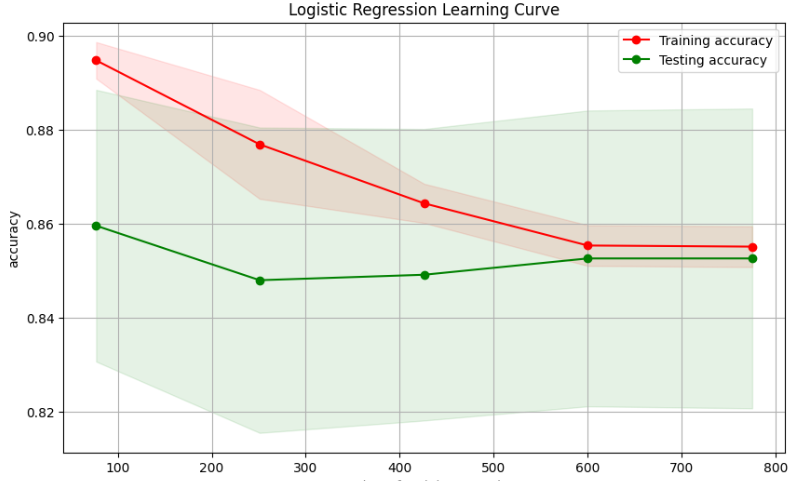

2. KNN

One weird thing over here is that the accuracy being plotted in the graph is way lower than what we have just measured. We measured the test accuracy for KNN as the highest among other models, which is at almost 0.879. But perhaps that is because the std for KNN testing's prediction is so high. 

Regarding the graph itself, everything looks good. There is a slight underfitting on the training prediction but no under/overfitting for the test prediction.
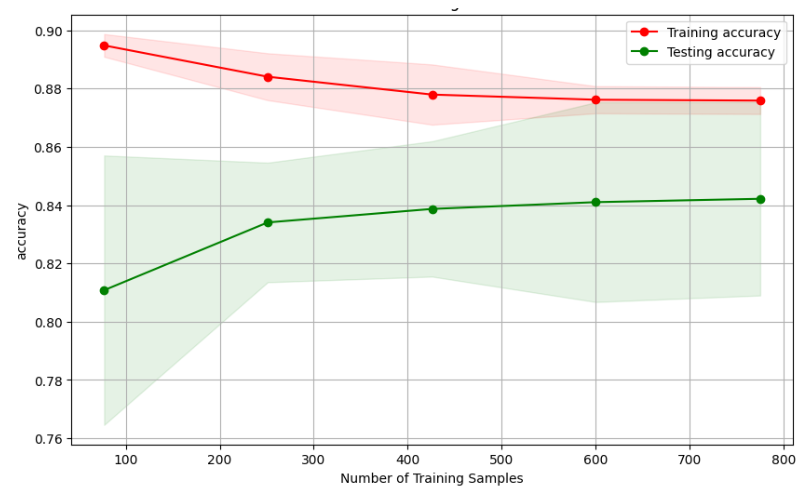

3. Naive Bayes

Not much to say about this one. No overfitting or underfitting occured.
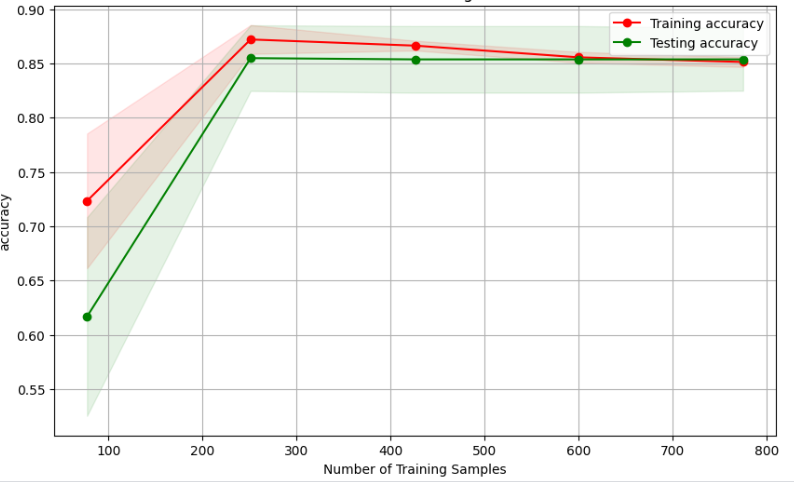

4. SVC

There is an underfitting to the training prediction but at least the test prediction looks good.
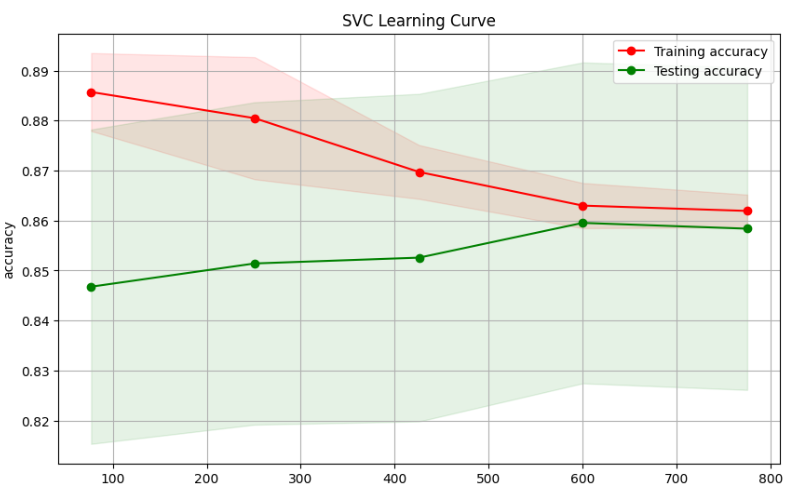

So far KNN is still the most promising.

## Classification Report

Let's line up classification report for each models.

Logistic Regression:<br>
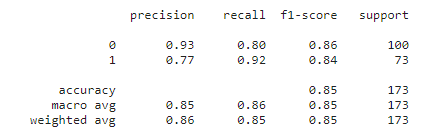

KNN:<br>
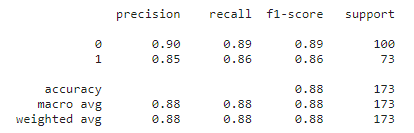

Naive Bayes:<br>
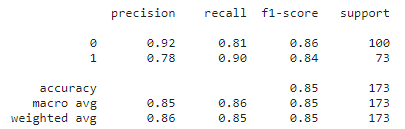

SVC:<br>
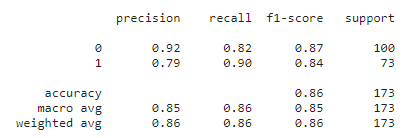

If we are going by convention and compare the F1 scores (F1 scores mix the effectiveness of recall with the cautiousness of orecision), unsurprisingly KNN model has the highest score. So far KNN has been very helpful in finding us the most ideal model. Its F1 score (macro avg) is 0.88 and this is also higher than (Tasci et al., 2022) at 0.858 and and (Noviandy et al., 2023) at 0.860.

# Conclusion

We have found KNN model as our best model which cut required features from 23 features to just 5 features, of which only 4 are molecular features. This slightly increase the reliability of machine learning modeling in solving Glioma grading problem while saving additional cost.